These results are for HBM-stack DRAM cache (16 interface of 128-MB) backed-up by DDR4 memory (2 interface of 32-GB).

In [3]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt

import os

datadir = '/scr/babaie/policyBaselineRes/3rd/dramCacheController/myPlots/res_Nov_7/NPB/Nov7/set2'


def getStat(filename, stat):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0



Stats = ['hostSeconds',
         'system.mem_ctrl.readReqs',
         'system.mem_ctrl.writeReqs',
         'system.mem_ctrl.servicedByWrQ',
         'system.mem_ctrl.mergedWrBursts',
         'system.mem_ctrl.numTotHits',
         'system.mem_ctrl.numTotMisses',
         'system.mem_ctrl.numColdMisses',
         'system.mem_ctrl.numHotMisses',
         'system.mem_ctrl.numRdMissClean',
         'system.mem_ctrl.numRdMissDirty',
         'system.mem_ctrl.numRdHit',
         'system.mem_ctrl.numWrMissClean',
         'system.mem_ctrl.numWrMissDirty',
         'system.mem_ctrl.numWrHit',
         'system.mem_ctrl.numRdHitDirty',
         'system.mem_ctrl.numRdHitClean',
         'system.mem_ctrl.numWrHitDirty',
         'system.mem_ctrl.numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'system.mem_ctrl.numColdMisses'
          ]




app = ['bt_C_x', 'cg_C_x', 'ep_C_x', 'is_C_x', 'lu_C_x', 'sp_C_x']
time = ['5sec']
size = ['128MiB']
cache = ['Alloy']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = -1
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df = pd.DataFrame(rows, columns=[
         'app',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'system.loc_mem_ctrl.dram.readBursts',
         'system.loc_mem_ctrl.dram.writeBursts',
         'system.far_mem_ctrl.dram.readBursts',
         'system.far_mem_ctrl.dram.writeBursts',
         'system.mem_ctrl.numColdMisses'
         ])





df.to_csv("/scr/babaie/policyBaselineRes/3rd/dramCacheController/myPlots/res_Nov_7/NPB/Nov7/npb_set2.csv")

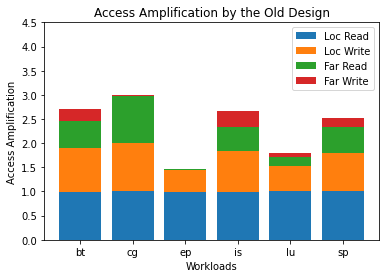

In [4]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']

y1 = df['system.loc_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y2 = df['system.loc_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y3 = df['system.far_mem_ctrl.dram.readBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))
y4 = df['system.far_mem_ctrl.dram.writeBursts'].astype(float) / (df['readReqs'].astype(float)+df['writeReqs'].astype(float))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)
plt.ylim([0,4.5])

plt.bar(x, y1, label = 'Loc Read')
plt.bar(x, y2, bottom=y1, label = 'Loc Write')
plt.bar(x, y3, bottom=y1+y2, label = 'Far Read')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Far Write')

plt.title("Access Amplification by the Old Design")
plt.xlabel("Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()

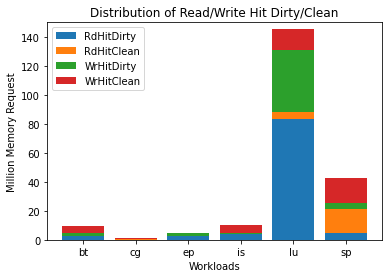

In [7]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']

y5 = df['numRdHitDirty'].astype(int)/1000000
y6 = df['numRdHitClean'].astype(int)/1000000
y7 = df['numWrHitDirty'].astype(int)/1000000
y8 = df['numWrHitClean'].astype(int)/1000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,150])

plt.bar(x, y5, label = 'RdHitDirty')
plt.bar(x, y6, bottom=y5, label = 'RdHitClean')
plt.bar(x, y7, bottom=y5+y6, label = 'WrHitDirty')
plt.bar(x, y8, bottom=y5+y6+y7, label = 'WrHitClean')

plt.title("Distribution of Read/Write Hit Dirty/Clean")
plt.xlabel("Workloads")
plt.ylabel("Million Memory Request")
plt.legend()
plt.show()

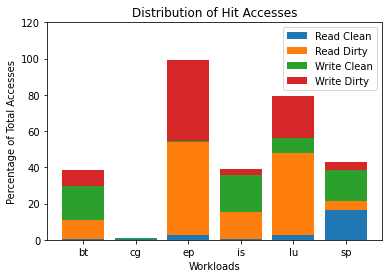

In [8]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']

y1 = 100*df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100*df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100*df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100*df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,120])

plt.bar(x, y1, label = 'Read Clean')
plt.bar(x, y2, bottom=y1, label = 'Read Dirty')
plt.bar(x, y3, bottom=y1+y2, label = 'Write Clean')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Dirty')

plt.title("Distribution of Hit Accesses")
plt.xlabel("Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()

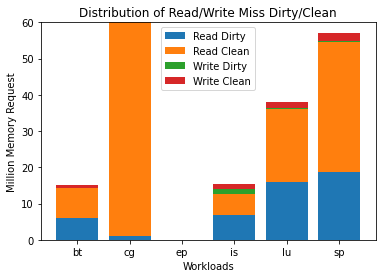

In [9]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']
y1 = df['numRdMissDirty'].astype(int)/1000000
y2 = df['numRdMissClean'].astype(int)/1000000
y3 = df['numWrMissDirty'].astype(int)/1000000
y4 = df['numWrMissClean'].astype(int)/1000000

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,60])

plt.bar(x, y1, label = 'Read Dirty')
plt.bar(x, y2, bottom=y1, label = 'Read Clean')
plt.bar(x, y3, bottom=y1+y2, label = 'Write Dirty')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Clean')

plt.title("Distribution of Read/Write Miss Dirty/Clean")
plt.xlabel("Workloads")
plt.ylabel("Million Memory Request")
plt.legend()
plt.show()

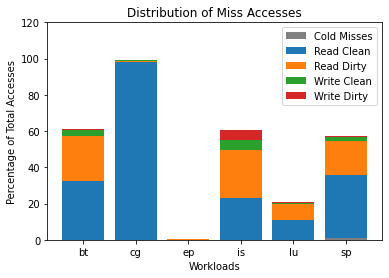

In [10]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']
y1 = 100 * df['system.mem_ctrl.numColdMisses'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 100 * (df['numRdMissClean'].astype(int)-df['system.mem_ctrl.numColdMisses'].astype(int))/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 100 * df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 100 * df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y5 = 100 * df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,120])

plt.bar(x, y1, label = 'Cold Misses', color = "gray")
plt.bar(x, y2, bottom=y1, label = 'Read Clean')
plt.bar(x, y3, bottom=y1+y2,label = 'Read Dirty')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Write Clean')
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Write Dirty')

plt.title("Distribution of Miss Accesses")
plt.xlabel("Workloads")
plt.ylabel("Percentage of Total Accesses")
plt.legend()
plt.show()

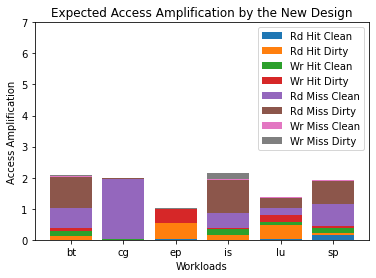

In [11]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']

y1 = 1*df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = 1*df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = 1*df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = 1*df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

y5 = 2*df['numRdMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y6 = 4*df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y7 = 1*df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y8 = 3*df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,7])

plt.bar(x, y1, label = 'Rd Hit Clean')
plt.bar(x, y2, bottom=y1, label = 'Rd Hit Dirty')
plt.bar(x, y3, bottom=y1+y2,label = 'Wr Hit Clean')
plt.bar(x, y4, bottom=y1+y2+y3, label = 'Wr Hit Dirty')
plt.bar(x, y5, bottom=y1+y2+y3+y4, label = 'Rd Miss Clean')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, label = 'Rd Miss Dirty')
plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, label = 'Wr Miss Clean')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, label = 'Wr Miss Dirty')

# plt.bar(x, y1, color ='purple')
# plt.bar(x, y2, bottom=y1, color ='purple')
# plt.bar(x, y3, bottom=y1+y2, color ='purple')
# plt.bar(x, y4, bottom=y1+y2+y3, color ='purple')
# plt.bar(x, y5, bottom=y1+y2+y3+y4, color ='purple')
# plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color ='purple')
# plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color ='purple')
# plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color ='purple')

plt.title("Expected Access Amplification by the New Design")
plt.xlabel("Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()

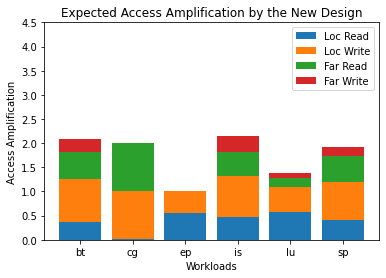

In [12]:
x = ['bt', 'cg', 'ep', 'is', 'lu', 'sp']

y1 = df['numRdHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y2 = df['numRdHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y3 = df['numWrHitClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y4 = df['numWrHitDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

y5 = df['numRdMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y6 = df['numRdMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y7 = df['numWrMissClean'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))
y8 = df['numWrMissDirty'].astype(int)/(df['readReqs'].astype(int)+df['writeReqs'].astype(int))

y11 = y1+y2+y6+y8
y22 = y5+y6+y3+y4+y7+y8
y33 = y5+y6
y44 = y8+y6

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(6, 4)

plt.ylim([0,4.5])

plt.bar(x, y11, label = 'Loc Read')
plt.bar(x, y22, bottom=y11, label = 'Loc Write')
plt.bar(x, y33, bottom=y11+y22, label = 'Far Read')
plt.bar(x, y44, bottom=y11+y22+y33, label = 'Far Write')

plt.title("Expected Access Amplification by the New Design")
plt.xlabel("Workloads")
plt.ylabel("Access Amplification")
plt.legend()
plt.show()